### Financial Inclusion in Africa

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler, 
    PolynomialFeatures,
    KBinsDiscretizer
)
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load files into a pandas dataframe
train = pd.read_csv('data/Train.csv')

# Observe the shape of our datasets.
print('train data shape :', train.shape)

train data shape : (23524, 13)


### 1. Exploratory Data Analysis 

In [9]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
## Checking target variable.
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [11]:
#Check statistical values for fields with other than numerical datatype
train.describe(exclude=np.number).T

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_1,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


In [12]:
#checking for null values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [13]:
# Check for duplicate values in all columns
duplicate_rows = train[train.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [country, year, uniqueid, bank_account, location_type, cellphone_access, household_size, age_of_respondent, gender_of_respondent, relationship_with_head, marital_status, education_level, job_type]
Index: []


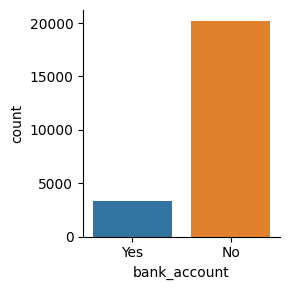

In [14]:
### Visualise the data 
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train, height=3, aspect=1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Kenya'),
  Text(1, 0, 'Rwanda'),
  Text(2, 0, 'Tanzania'),
  Text(3, 0, 'Uganda')])

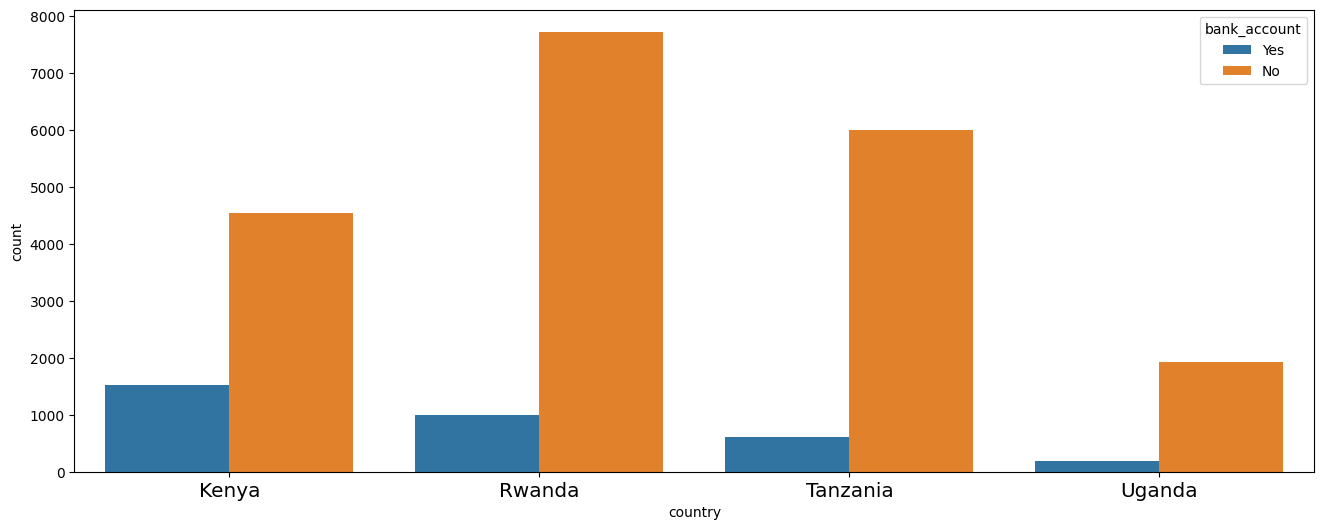

In [15]:
#Explore financial inclusion by country 
plt.figure(figsize=(16, 6))
sns.countplot(x='country', hue= 'bank_account', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

### 2. Data Processing

In [16]:
fina_ran = pd.read_csv('data/Train.csv')
fina_ran.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [17]:
#dropping columns not relevant for the modelling.

finan_ran = fina_ran.drop(['country','year','uniqueid','relationship_with_head'], axis=1)

In [18]:
#Using label encoder for labelling the categorical columns 

le = LabelEncoder()
finan_ran['bank_account'] = le.fit_transform(finan_ran['bank_account'])

#defining X and y

X = finan_ran.drop('bank_account', axis=1)
y = finan_ran['bank_account']

In [19]:
#Splitting the data into test and train for model building

X_train, X_test,y_train, y_test = train_test_split(X,y , test_size= 0.20, random_state=42, stratify=y)

### 3. Creating Pipelines

In [20]:
#defining the numerical and categorical features.

num_features = list(X_train.select_dtypes(exclude=['object']).columns)
cat_features = list(X_train.select_dtypes(include=['object']).columns)

#defining transformers.

num_transformer = ImbPipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaling', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3))
    ])
cat_transformer = ImbPipeline(steps=
                           [
        ('imputer', SimpleImputer(strategy='most_frequent')),
    
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

#defining preprocessor.

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features),
        ('cat_transformer', cat_transformer, cat_features)
        
    ],remainder='passthrough')

### Model Pipelines

In [25]:
# Random forest 
baseline_ran_ = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('Smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1, verbose = 1))
         
         ])

# XGB Classifer Model

baseline_xgb_ = ImbPipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('Smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42,n_jobs=-1))
         ])

### 4. Baseline Model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Test-------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4043
           1       0.48      0.45      0.46       662

    accuracy                           0.85      4705
   macro avg       0.70      0.68      0.69      4705
weighted avg       0.85      0.85      0.85      4705

Accuracy score: 0.8548352816153029


Text(0.5, 1.0, 'Confusion Matrix')

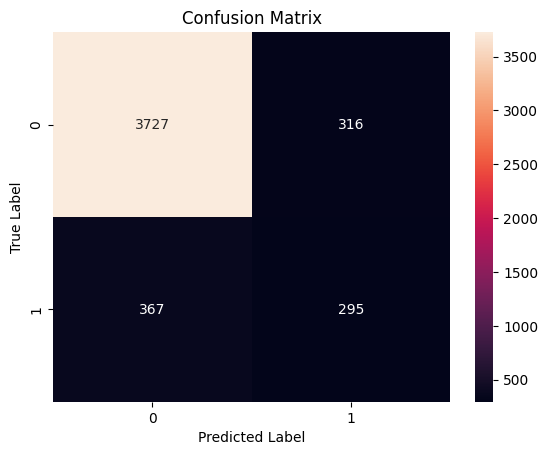

In [22]:
#random forest baseline model on train 

baseline_ran_.fit(X_train, y_train)

y_ran= baseline_ran_.predict(X_test)

#printing the classification report

print('Test-------------------')
print(classification_report(y_test, y_ran))
print('Accuracy score:', accuracy_score(y_test, y_ran))

#plotting the consufion matrix

cm=confusion_matrix(y_test, y_ran)
sns.heatmap(cm, annot=True, fmt ='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

### Finding the best parameters 

In [24]:
#defining parametres grid

param_grid = {
    'classifier__n_estimators': np.linspace(10, 200).astype(int),
    'classifier__max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'classifier__max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'classifier__max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__bootstrap': [True, False]
}

#fitting randomized search cross validation, using recall as scoring because its more relavant to the problem

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(baseline_ran_, param_grid, n_jobs=-1, 
                        scoring='recall', cv=3, 
                        n_iter=10, verbose=5, random_state=42)

rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   15.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   15.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 out of

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num_transformer',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaling',
                                                                                                StandardScaler()),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=3))]),
                                                                               ['household_size',
                                                                                'age_of_respondent']),
                                                                              ('cat_transformer',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImpu...
                                                                       11, 11,
                                                                       11, 11,
                                                                       11, 11,
                                                                       11, 11,
                                                                       11, 11,
                                                                       11, 11,
                                                                       12, 12,
                                                                       12, 12, ...],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=42, scoring='recall', verbose=5)

### 5. Best Model

In [27]:
#displaying the best paramentres

rs.best_params_
#defining the best model

best_model = rs.best_estimator_

In [28]:
## fitting the best model
best_model.fit(X_train, y_train)

#making predcitions on the train set
rf_train = best_model.predict(X_train)
#displaying the classification report on y_train
print(classification_report(y_train, rf_train))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  91 out of  91 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.94      0.74      0.83     16169
           1       0.31      0.74      0.44      2650

    accuracy                           0.74     18819
   macro avg       0.63      0.74      0.63     18819
weighted avg       0.86      0.74      0.77     18819

[CV 1/3] END classifier__bootstrap=False, classifier__max_depth=17, classifier__max_features=0.5, classifier__max_leaf_nodes=18, classifier__min_samples_split=10, classifier__n_estimators=149;, score=0.661 total time=  35.6s
[CV 2/3] END classifier__bootstrap=False, classifier__max_depth=17, classifier__max_features=0.6, classifier__max_leaf_nodes=46, classifier__min_samples_split=2, classifier__n_estimators=134;, score=0.616 total time=  44.7s
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=19, classifier__max_features=0.5, classifier__max_leaf_nodes=45, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.607 total time= 1.0min


In [29]:
## Predicting to check for performance of model on test data

In [30]:
#making predictions on the test set

rf_predictions = best_model.predict(X_test)

#printing the classification report and recall score

print(classification_report(y_test, rf_predictions))
print(accuracy_score(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      4043
           1       0.31      0.75      0.44       662

    accuracy                           0.74      4705
   macro avg       0.63      0.74      0.63      4705
weighted avg       0.86      0.74      0.77      4705

0.7351753453772583


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  91 out of  91 | elapsed:    0.1s finished
